**Prodigy Intership**

*   Machine Learning
*   Task 1 : Implementing a linear regression model to predict the price of houses based on square footage & number of bedrooms & bathrooms.
---
Done By : Yasmeen Toukhy

---







In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [34]:
dataSet= pd.read_csv('Housing.csv')
print(dataSet.shape)

(545, 13)


In [35]:
dataSet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [36]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [37]:
dataSet.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [38]:
dataSet.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [39]:
dataSet.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [40]:
x= dataSet[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y= dataSet['price']

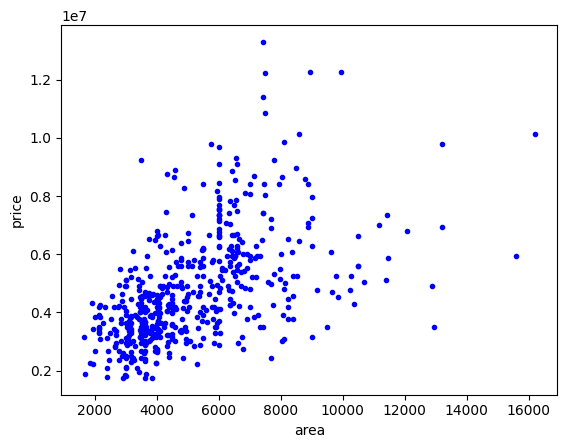

In [41]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(dataSet.area,dataSet.price,color='blue',marker='.')

In [42]:
New_data = dataSet.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)
New_data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [43]:
X = New_data.iloc[:,1:].values
Y = New_data.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [44]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train,y_train)
mlr_score = Linear_Regression.score(X_test,y_test)
predict_Linear_Regression = Linear_Regression.predict(X_test)
Exp_Linear_Regression = explained_variance_score(predict_Linear_Regression,y_test)

In [45]:
DecisionTree = DecisionTreeRegressor(random_state=0)
DecisionTree.fit(X_train,y_train)
DecisionTree.score(X_test,y_test)
predict_DecisionTree = DecisionTree.predict(X_test)
decision_score=DecisionTree.score(X_test,y_test)
expl_DecisionTree = explained_variance_score(predict_DecisionTree,y_test)

In [46]:
RFM = RandomForestRegressor(n_estimators=28,random_state=0)
RFM.fit(X_train,y_train)
RFM.score(X_test,y_test)
RFM_pred =RFM.predict(X_test)
RFM_score=RFM.score(X_test,y_test)
expl_RFM = explained_variance_score(RFM_pred,y_test)

In [49]:
print("Multiple Linear 'Regression Model' Score : ",round(Linear_Regression.score(X_test,y_test)*100))
print("Decision tree   'Regression Model' Score : ",round(DecisionTree.score(X_test,y_test)*100))
print("Random Forest   'Regression Model' Score : ",round(RFM.score(X_test,y_test)*100))
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,RFM_score],
                            ' Variance Score':[Exp_Linear_Regression,expl_DecisionTree,expl_RFM]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear 'Regression Model' Score :  60
Decision tree   'Regression Model' Score :  28
Random Forest   'Regression Model' Score :  44


,Model,Score,Variance Score
0,Multiple Linear Regression,0.598608,0.560337
2,Random forest Regression,0.444687,0.389760
1,Decision Tree,0.281416,0.421902
